# 1. Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Data Load

In [2]:
main_data = pd.read_fwf('dataset.txt', header=None)

# 3. Data Normalize

In [3]:
def data_normalize(data):
    data = data.astype('float32')
    data = (data-data.mean())/data.std()
    return data.values


data = data_normalize(main_data)

# 4. Data Plot Function

# Qus 1(i) Data Plot

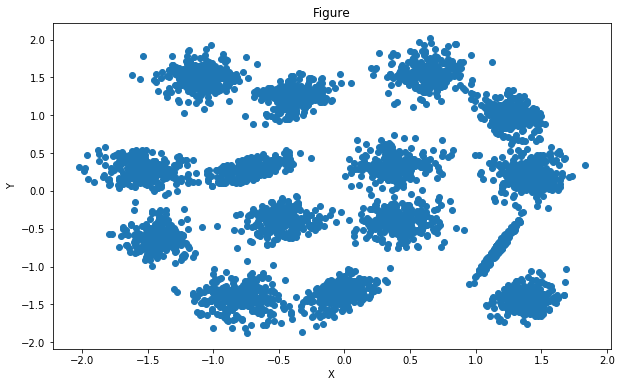

In [4]:
def show(x, y, title="Figure", xlabel="X", ylabel="Y", flag=0):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if flag:
        plt.plot(x, y, linewidth=3)
    else:
        plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    

show(data[:, 0], data[:, 1])

# 5. K-means Cluster Class

In [5]:
class kmeans():
    def __init__(self, data, k):
        self.data = data
        self.label = np.zeros((data.shape[0], 1))
        self.k = k
        point = np.random.choice(range(data.shape[0]), self.k, replace=False)
        self.centroid = self.data[point]
        self.best_centroid = None
        self.cost_val = None

    def cost(self):
        cost_val = 0
        for i in range(self.centroid.shape[0]):
            temp = self.data[(self.label == i).flatten(), :]
            cost_val += np.sqrt((self.centroid[i, :]-temp)**2).sum()
        return cost_val/self.data.shape[0]

    def fit(self):
        count = 0
        while count < 300:
            current = self.cost()
            try:
                if (prev-current) < 0.001:
                    break
            except:
                pass
            for i in range(data.shape[0]):
                self.label[i] = np.argmin(
                    np.sum(np.sqrt((self.centroid-data[i, :])**2), axis=1))

            for i in range(self.centroid.shape[0]):
                temp = self.data[(self.label == i).flatten(), :]
                if len(temp):
                    self.centroid[i] = np.average(temp, axis=0)
            prev = current
            count += 1

        return current

    def best_fit(self, centroid_init=10):

        self.cost_val = np.float('inf')
        for i in range(centroid_init):
            point = np.random.choice(
                range(data.shape[0]), self.k, replace=False)
            self.centroid = self.data[point]
            temp_cost = self.fit()
            if self.cost_val > temp_cost:
                self.best_centroid = self.centroid.copy()
                self.cost_val = temp_cost
        self.final_label()

    def final_label(self):
        for i in range(data.shape[0]):
            self.label[i] = np.argmin(np.sum(np.sqrt((self.best_centroid-data[i, :])**2), axis=1))

    def show(self, color="red", size=300):
        plt.figure(figsize=(10, 8))
        plt.title("Data Clustering")
        plt.scatter(self.data[:, 0], self.data[:, 1], c=self.label[:, 0])

        for i, j in zip(range(65, 65+self.k), self.best_centroid):
            plt.scatter(j[0], j[1], c=color, s=size, marker="$"+chr(i)+"$")

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

# 5. Finding Number of Clusters
## In this function, I have used slope comparision for finding value of k
## This method work good when number of initialization for centroids is high

In [15]:
def k_calculate(data, max_k=3, centroid_init=10):
    cost = []
    threshold = 0
    choose = 1
    for i in range(1, max_k+1):
        a = kmeans(data, i)
        a.best_fit(centroid_init)
        cost.append(a.cost_val)
        try:
            current = 180 + np.rad2deg(np.arctan(data.shape[0]*(cost[-1]-cost[-2])))%180
            if threshold < (current-prev):
                choose = i-1
                threshold = (current-prev)
            prev = current
        except:
            if i != 1:
                prev = current
            pass
    print("K = ", choose)
    show(range(1, max_k+1), cost, "Cost Curve", "Value of K", "Cost value", 1)
    return choose

# Qus 1(ii) Finding The Number of Clusters

## 1. If possible to visualize the data, then we can determine the cluster number not always but most of the time.

## 2. Plotting the cost curve for different number of cluster & analyze where cost changing rate significantly decrease ( Find the "L" shape ), that will be our cluster number.

### My cluster calculate function takes 5.51s to find best value of k,
#### k = Number of cluster</p><b>
    
#### 1.This part takes time to run, depends on centroid initialization value. ####
#### 2.Your result may be vary,but after running multiple time you will get result identical as our. ####
#### 3.And if you increase centroid initialization number,result will be more accurate. ####

K =  15


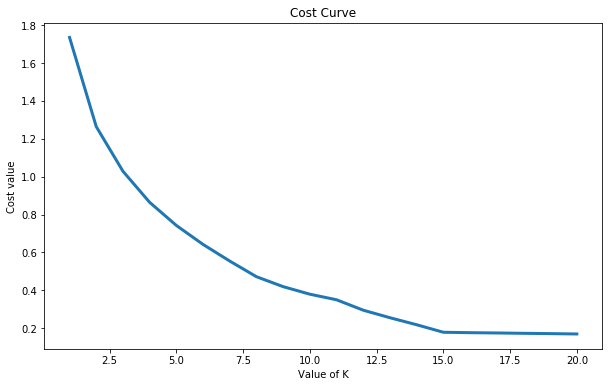

In [18]:
k = k_calculate(data, max_k=20, centroid_init=20)

# Qus 1(iii) Choosing The Centroids

## 1. If we got lucky, we will randomly choose the best centroid at once. But in most of the case we are not lucky

## 2. So randomly choosing centroids from datapoints & calculating cost for this points.

## 3. Repeat this process to find minimum cost for a specific random initialization, that gives us, our best centroid value.

# Qus 1(iv) Clusters Plotting with Different Colors & Labeled with Alphabets

## 1. Determine the cluster number dynamically
## 2. Plot the curve from class number that previously obtained dynamically.

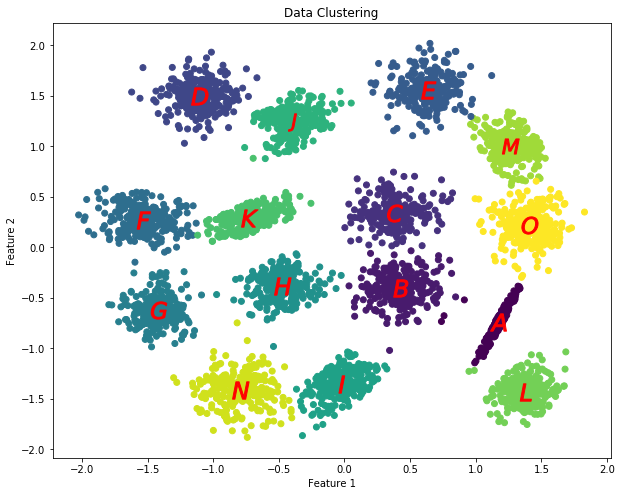

In [19]:
a = kmeans(data, k)
centroid_init = int(np.sqrt(data.shape[0]))
a.best_fit(centroid_init)
a.show()

# 6. Set Cluster Number Manually

Cost = 0.1784


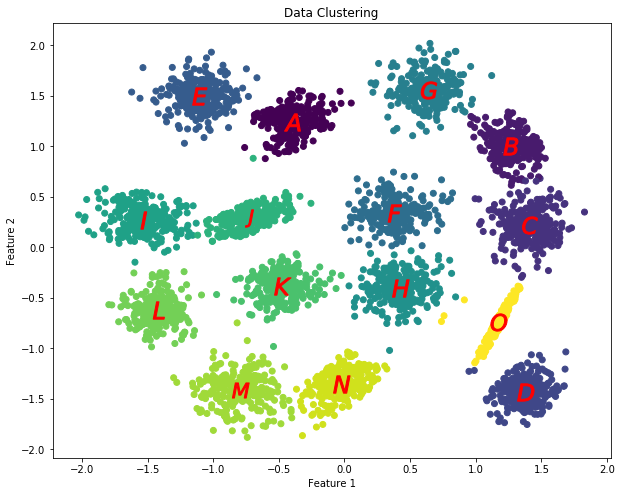

In [21]:
centroid_init = int(np.sqrt(data.shape[0]))
b = kmeans(data, 15)
b.best_fit(centroid_init)
print("Cost = {:.4f}".format(b.cost_val))
b.show()